In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/exams.csv


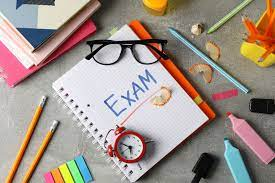

> <div class="alert alert-block alert-info">
<b></b> <strong>Import Libraries</strong></div>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

> <div class="alert alert-block alert-info">
<b></b> <strong>Data Reading</strong></div>

In [4]:
df= pd.read_csv("../input/students-performance-in-exams/exams.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


> <div class="alert alert-block alert-info">
<b></b> <strong>information about data</strong></div>

In [5]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82
999,male,group A,some college,standard,completed,65,60,62


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [7]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.head()

> <div class="alert alert-block alert-info">
<b></b> <strong>Rename</strong></div>

In [ ]:
df=df.rename(columns={"race/ethnicity":"race_ethnicity","parental level of education":"Education","test preparation course":"test_preparation_course","math score":"math_score","reading score":"reading_score","writing score":"writing_score"})
df.head()

> <div class="alert alert-block alert-info">
<b></b> <strong>DATA VISUALIZATION</strong></div>

In [ ]:
def bar_plot(variable):

    var = df[variable]
    
    varValue = var.value_counts()
    

    plt.figure(figsize =(5,5))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values,rotation=45)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

In [ ]:
category1 = ["gender","race_ethnicity","Education","lunch","test_preparation_course"]

for c in category1:
    
    bar_plot(c)


> <div class="alert alert-block alert-warning">
<b></b> <strong>These graphs have been drawn to give us a little bit of information.
</strong></div>

In [ ]:
df.race_ethnicity.value_counts()

In [ ]:
sns.countplot(data=df,x="race_ethnicity")
plt.show()

> <div class="alert alert-block alert-warning">
<b></b> <strong>This graph indicates that there are more people in group C.
</strong></div>

In [ ]:
df[df.gender=="female"].race_ethnicity.value_counts(normalize=True)

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df["race_ethnicity"].value_counts().index
sizes = df["race_ethnicity"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

> <div class="alert alert-block alert-warning">
<b></b> <strong>This pie chart shows that there are more people in group C than others.
</strong></div>

In [ ]:
sns.countplot(x=df["race_ethnicity"], hue=df["gender"], palette="bone")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Frequency")
plt.show()

In [ ]:
sns.histplot(data=df, y="race_ethnicity", hue= "gender", palette="coolwarm", kde= True)
plt.show()


In [ ]:
sns.histplot(data=df, y="race_ethnicity", hue= "gender", palette="ocean")
plt.show()

In [ ]:
df[df.gender=="female"].race_ethnicity.value_counts()

In [ ]:
sns.countplot(data=df,x=df[df.gender=="female"].race_ethnicity.value_counts())
plt.show()

In [ ]:
df.Education.value_counts()


In [ ]:
plt.xticks(rotation=45)
sns.countplot(data=df,x="Education",palette="Paired")
plt.show()

In [ ]:
labels = df["Education"].value_counts().index
sizes = df["Education"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
df.gender.value_counts()


In [ ]:
sns.countplot(data=df,x="gender",palette="crest_r")
plt.show()

In [ ]:
df.lunch.value_counts()


In [ ]:
sns.countplot(data=df, x="lunch",palette="RdYlGn_r")
plt.show()

In [ ]:
df.test_preparation_course.value_counts()

In [ ]:
sns.countplot(data=df, x="test_preparation_course",palette="autumn")
plt.show()

In [ ]:
sns.barplot(data=df, x="math_score", y="Education")
plt.show()


In [ ]:
df.head()

### test_preparation_course-math_score
### test_preparation_course-reading_score
### test_preparation_course-writing_score


In [ ]:
sns.catplot(data=df,x="test_preparation_course",y="math_score",kind="bar",palette="crest")
plt.show()

In [ ]:
sns.catplot(data=df,x="test_preparation_course",y="reading_score",kind="bar",palette="nipy_spectral_r")
plt.show()

In [ ]:
sns.catplot(data=df,x="test_preparation_course",y="writing_score",kind="bar",palette="prism_r")
plt.show()

> <div class="alert alert-block alert-warning">
<b></b> <strong>From these tables we can conclude that the passing grade is about 70.
</strong></div>

### Education-math_score 
             &
### Education-reading_score
             &
### Education-writing_score    

In [ ]:
y=df[["Education","math_score","reading_score","writing_score"]].groupby(["Education"]).mean().sort_values(by="math_score",ascending = False)
y


In [ ]:
sns.catplot(x="Education",y="math_score",data=df, palette="ocean",kind="bar")
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.catplot(data=df,x="Education", y="reading_score", kind="bar",palette="BuPu")
plt.xticks(rotation=90)
plt.xlabel("Education")
plt.ylabel("Reading Score")
plt.title("Education/Reading Score")
plt.show()

In [ ]:
sns.catplot(data=df,x="Education",y="writing_score",kind="bar",palette="tab20")
plt.xticks(rotation=90)
plt.show()

In [ ]:
data1 = df['race_ethnicity'].head()
data2= df['math_score'].head()
conc_data_col = pd.concat([data1,data2],axis =1) # axis = 1 : adds dataframes in column
conc_data_col

### race_ethnicity-math_score   
            &
### race_ethnicity-reading_score 
            &
### race_ethnicity-writing_score

In [ ]:
a=df.groupby(["race_ethnicity"])["math_score"].mean()
a

In [ ]:
sns.catplot(kind="bar",x="race_ethnicity",y="math_score",data=df,palette="pastel")
plt.show()

In [ ]:
df.groupby(["race_ethnicity"])["reading_score"].mean()

In [ ]:
sns.catplot(kind="bar",x="race_ethnicity",y="reading_score",data=df,palette="terrain")
plt.show()

In [ ]:
df.groupby(["race_ethnicity"])["writing_score"].mean()

In [ ]:
sns.catplot(kind="bar",x="race_ethnicity",y="writing_score",data=df,palette="PuRd")
plt.show()